# Import Liberies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import chi2,chi2_contingency
import scipy.stats as sat
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)



# Read Dataset

In [3]:
import pandas as pd
order=pd.read_csv("olist_orders_dataset.csv")
order_items=pd.read_csv("olist_order_items_dataset.csv")
product=pd.read_csv("olist_products_dataset.csv")
customer=pd.read_csv("olist_customers_dataset.csv")
seller=pd.read_csv("olist_sellers_dataset.csv")
payments=pd.read_csv("olist_order_payments_dataset.csv")
reviews=pd.read_csv("olist_order_reviews_dataset.csv")
geolocation=pd.read_csv("olist_geolocation_dataset.csv")
pd.set_option('display.max_columns',None)


# Merge Dataset

In [4]:
df=order.copy()
df=df.merge(order_items,on="order_id",how="left")
df=df.merge(product,on="product_id",how="left")
df=df.merge(payments,on="order_id",how="left")
df=df.merge(reviews,on="order_id",how="left")
df=df.merge(customer,on="customer_id",how="left")
df=df.merge(seller,on="seller_id",how="left")

# Convert Date column Dtype

In [5]:
df['purchase_year']=pd.to_datetime(df['order_purchase_timestamp']).dt.year
df['purchase_month']=pd.to_datetime(df['order_purchase_timestamp']).dt.month
df['order_approved_days']=pd.to_datetime(df['order_approved_at']).dt.day
df['order_delivered_date']=pd.to_datetime(df['order_delivered_customer_date']).dt.date
df['review_date']=pd.to_datetime(df['review_creation_date']).dt.date
df['review_answer_time']=pd.to_datetime(df['review_answer_timestamp']).dt.time
df['estimated_days']=(pd.to_datetime(df['order_estimated_delivery_date'])-pd.to_datetime(df['order_purchase_timestamp'])).dt.days
df['order_purchase_timestamp']=pd.to_datetime(df['order_purchase_timestamp'],errors='coerce')
df['shipping_limit_date']=pd.to_datetime(df['shipping_limit_date'],errors='coerce')
df['shipping_days']=(df['shipping_limit_date']-df['order_purchase_timestamp']).dt.days


In [6]:
df['order_approved_at']=pd.to_datetime(df['order_approved_at'],errors='coerce')
df['order_approved_hour']=df['order_approved_at'].dt.hour


In [7]:
print(df.shape)
df.head()

(119143, 48)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,purchase_year,purchase_month,order_approved_days,order_delivered_date,review_date,review_answer_time,estimated_days,shipping_days,order_approved_hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,2017,10,2.0,2017-10-10,2017-10-11,03:43:48,15,4.0,11.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,2017,10,2.0,2017-10-10,2017-10-11,03:43:48,15,4.0,11.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,2017,10,2.0,2017-10-10,2017-10-11,03:43:48,15,4.0,11.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.0,belo horizonte,SP,2018,7,26.0,2018-08-07,2018-08-08,18:37:50,19,5.0,3.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.0,guariba,SP,2018,8,8.0,2018-08-17,2018-08-18,19:07:58,26,5.0,8.0


# Normal Distribution

<Axes: xlabel='price', ylabel='Density'>

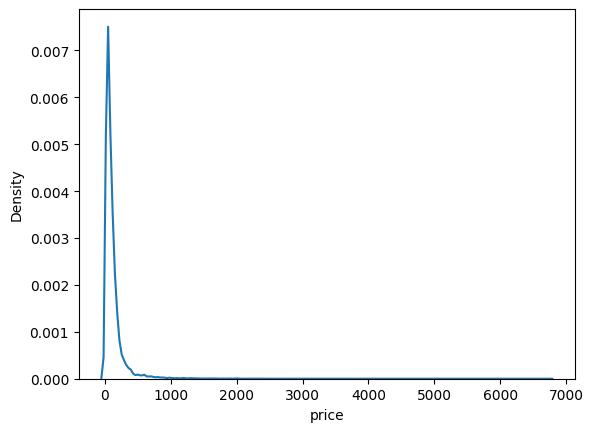

In [9]:
sns.kdeplot(df['price'])

# Cat Plots

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'utilidades_domesticas'),
  Text(1, 0, 'automotivo'),
  Text(2, 0, 'moveis_decoracao'),
  Text(3, 0, 'ferramentas_jardim'),
  Text(4, 0, 'informatica_acessorios'),
  Text(5, 0, 'cama_mesa_banho'),
  Text(6, 0, 'telefonia'),
  Text(7, 0, 'beleza_saude'),
  Text(8, 0, 'relogios_presentes'),
  Text(9, 0, 'esporte_lazer')])

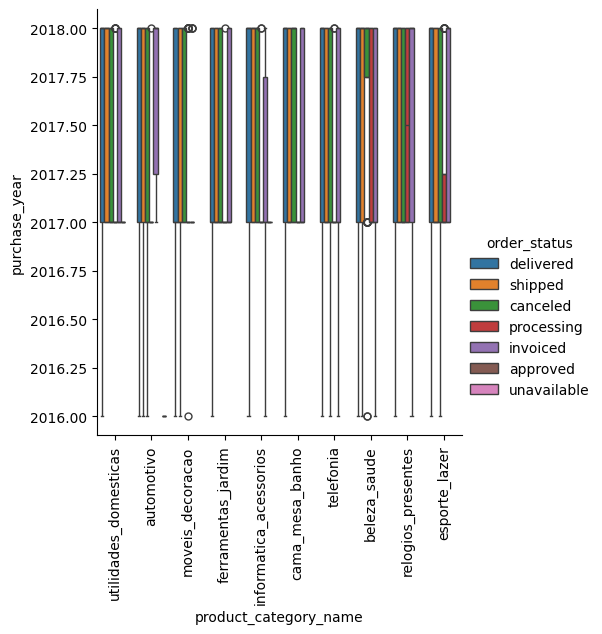

In [10]:
top10=df['product_category_name'].value_counts().head(10).index
df_top10=df[df['product_category_name'].isin(top10)]
sns.catplot(
    data=df_top10,
    x='product_category_name',
    y='purchase_year',
    hue='order_status',
    kind='box'
)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'belo horizonte'),
  Text(1, 0, 'guariba'),
  Text(2, 0, 'guarulhos'),
  Text(3, 0, 'sao paulo'),
  Text(4, 0, 'itaquaquecetuba'),
  Text(5, 0, 'ribeirao preto'),
  Text(6, 0, 'ibitinga'),
  Text(7, 0, 'jacarei'),
  Text(8, 0, 'santo andre'),
  Text(9, 0, 'curitiba'),
  Text(10, 0, 'praia grande'),
  Text(11, 0, 'campinas'),
  Text(12, 0, 'salto'),
  Text(13, 0, 'sao bernardo do campo'),
  Text(14, 0, 'rio de janeiro'),
  Text(15, 0, 'maringa'),
  Text(16, 0, 'limeira'),
  Text(17, 0, 'piracicaba'),
  Text(18, 0, 'campo limpo paulista'),
  Text(19, 0, 'sao jose do rio preto')])

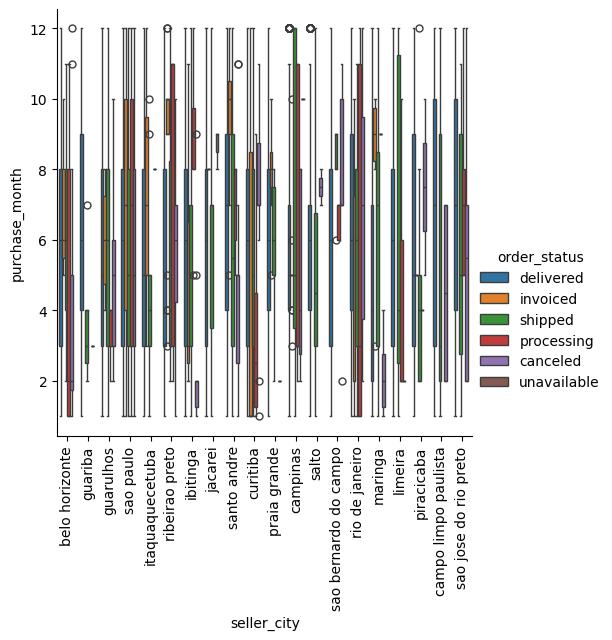

In [11]:
top20=df['seller_city'].value_counts().head(20).index
df_top20=df[df['seller_city'].isin(top20)]
sns.catplot(
    data=df_top20,
    x='seller_city',
    y='purchase_month',
    hue='order_status',
    kind='box'
)
plt.xticks(rotation=90)

# Chi-Square Test

In [12]:
df_sample=df.sample(5000,random_state=42)

In [ ]:
con=pd.crosstab(df_sample['order_status'],df_sample['product_category_name'])  
chi2,p,dof,excepted=sat.chi2_contingency(con)
print("chi-square:",chi2)          # H1 is Accept there are significant different in order status and product category
print("P-value:",p)                # Keep the column
print("Degrees of Freedom:",dof)

chi-square: 549.4197251619617
P-value: 3.453790300280264e-22
Degrees of Freedom: 264


In [ ]:
con=pd.crosstab(df_sample['order_status'],df_sample['payment_type'])
chi2,p,dof,excepted=sat.chi2_contingency(con)
print("chi-square:",chi2)          # H1 is Accept there are significant different in order status and payment type
print("P-value:",p)                # keep the column
print("Degrees of Freedom:",dof)

chi-square: 32.2849213550459
P-value: 0.005886888566155585
Degrees of Freedom: 15


In [ ]:
con=pd.crosstab(df_sample['order_status'],df_sample['review_comment_title'])
chi2,p,dof,excepted=sat.chi2_contingency(con)
print("chi-square:",chi2)
print("P-value:",p)                   # H1 is Accept there are significant different in order status and riview comment
print("Degrees of Freedom:",dof)      # Keep the column 

chi-square: 2283.718011066947
P-value: 4.622989087597771e-27
Degrees of Freedom: 1600


In [ ]:
con=pd.crosstab(df_sample['order_status'],df_sample['review_comment_message'])
chi2,p,dof,excepted=sat.chi2_contingency(con)
print("chi-square:",chi2)          # H0 is Accepct there are no significant different in order status and riview message
print("P-value:",p)                # Delete the column
print("Degrees of Freedom:",dof)

chi-square: 10766.683569792676
P-value: 8.417316382045663e-05
Degrees of Freedom: 10220


In [ ]:
con=pd.crosstab(df_sample['order_status'],df_sample['customer_city'])
chi2,p,dof,excepted=sat.chi2_contingency(con)
print("chi-square:",chi2)
print("P-value:",p)              # H1 is Accept there are  significant different in order status and customer city
print("Degrees of Freedom:",dof) # Keep the column

chi-square: 5160.7522112450415
P-value: 0.9999872333017259
Degrees of Freedom: 5595


In [ ]:
con=pd.crosstab(df_sample['order_status'],df_sample['customer_state'])
chi2,p,dof,excepted=sat.chi2_contingency(con)
print("chi-square:",chi2)
print("P-value:",p)          # H1 is Accept there are significant differnt in order status and customer state
print("Degrees of Freedom:",dof)  # Keep the column

chi-square: 192.59372076296802
P-value: 0.00030102025465315245
Degrees of Freedom: 130


In [ ]:
con=pd.crosstab(df_sample['order_status'],df_sample['seller_city'])
chi2,p,dof,excepted=sat.chi2_contingency(con)
print("chi-square:",chi2)
print("P-value:",p)           # H1 is accepct there are significant different in order status and seller city
print("Degrees of Freedom:",dof)  # Keep the column

chi-square: 2265.659565614608
P-value: 2.9458582406365895e-56
Degrees of Freedom: 1292


In [ ]:
con=pd.crosstab(df_sample['order_status'],df_sample['seller_state'])
chi2,p,dof,excepted=sat.chi2_contingency(con)
print("chi-square:",chi2)
print("P-value:",p)       #H1 is Accepct there are significant different in order status and seller state
print("Degrees of Freedom:",dof)  # Keep the column

chi-square: 23.534990287724828
P-value: 0.9999999005486778
Degrees of Freedom: 68


# EDA-Exploratory Data Analysis

# Bar Plot

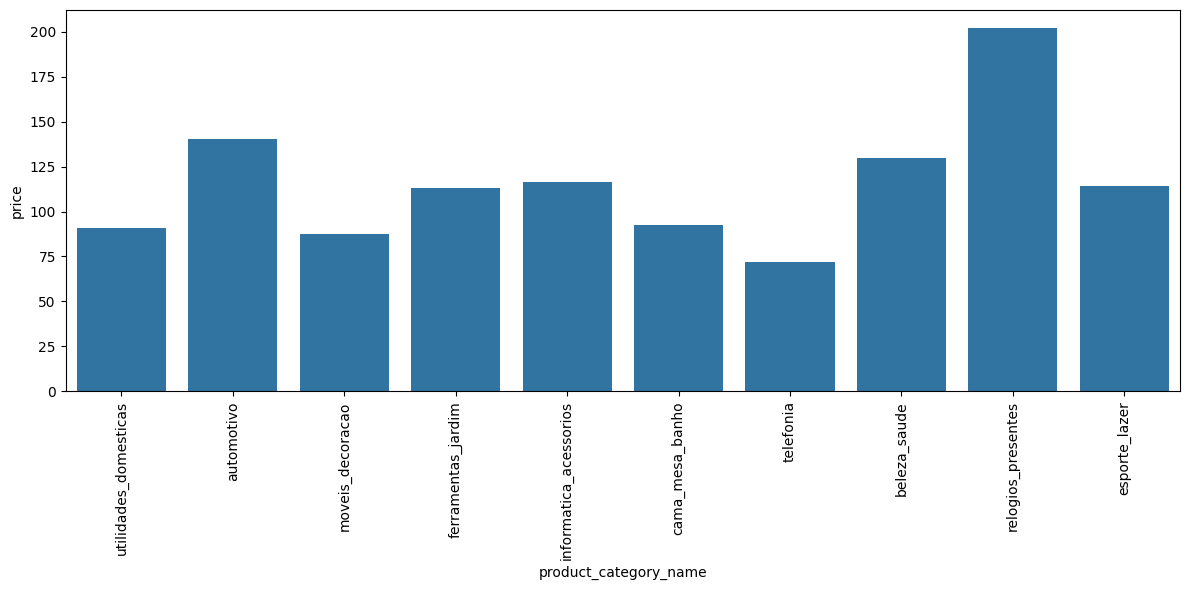

In [21]:
top10=df['product_category_name'].value_counts().head(10).index
df_top10=df[df['product_category_name'].isin(top10)]
plt.figure(figsize=(12,6))
sns.barplot(
    x='product_category_name',
    y='price',
    data=df_top10,
    errorbar=None
)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Scatter Plot

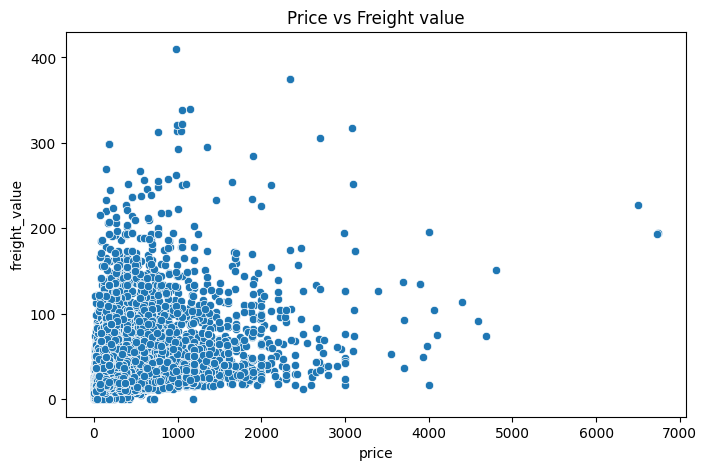

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='price',y='freight_value',data=df)
plt.title("Price vs Freight value")
plt.show()

# Count Plot

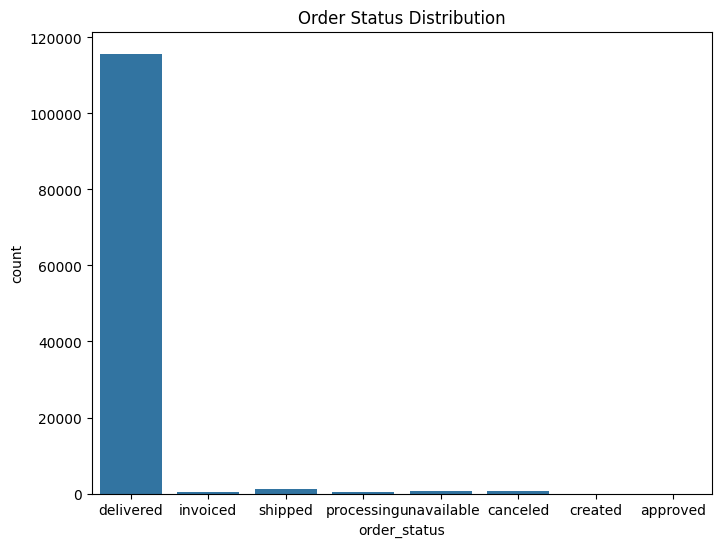

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='order_status',data=df)
plt.title("Order Status Distribution")
plt.show()

# Hist Plot

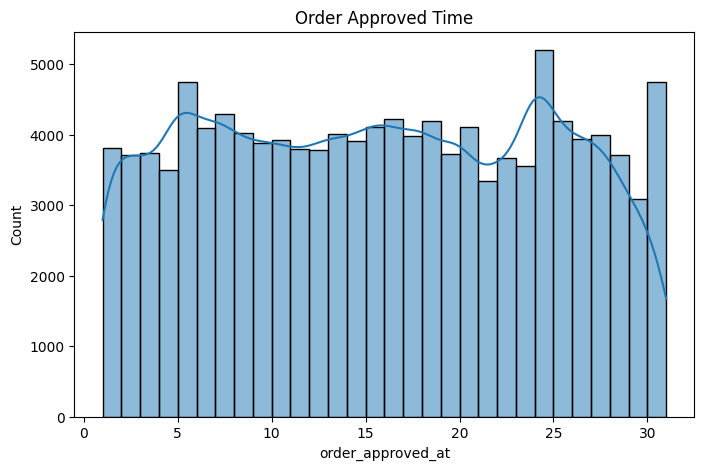

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['order_approved_days'],bins=30,kde=True)
plt.title("Order Approved Time")
plt.xlabel("order_approved_at")
plt.show()


# Pie Chart

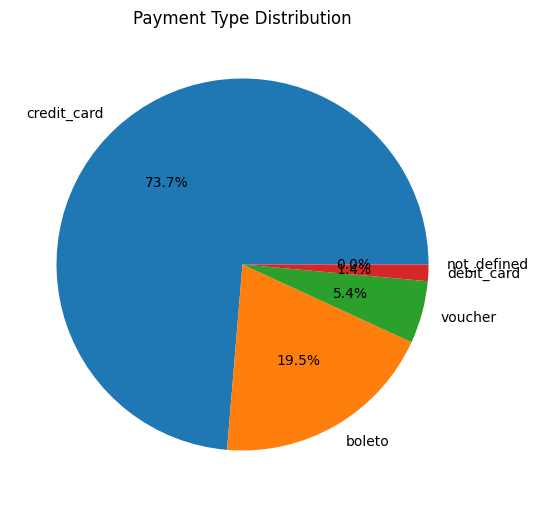

In [25]:
count=df['payment_type'].value_counts()
plt.figure(figsize=(6,7))
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.title("Payment Type Distribution")
plt.show()

# Feature Engineering

In [26]:
df=df.drop(columns=['order_purchase_timestamp','order_approved_at','order_delivered_customer_date','review_creation_date','order_delivered_carrier_date','review_answer_timestamp','order_estimated_delivery_date','shipping_limit_date','order_item_id','review_id','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','review_comment_message'])

In [27]:
df.drop('order_delivered_date',axis=1,inplace=True)

In [30]:
df=df.drop(columns=['review_date','review_answer_time',])

KeyError: "['review_date', 'review_answer_time'] not found in axis"

In [29]:
df.head()

,order_id,customer_id,order_status,product_id,seller_id,price,freight_value,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_title,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,purchase_year,purchase_month,order_approved_days,estimated_days,shipping_days,order_approved_hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,1.0,credit_card,1.0,18.12,4.0,NaN,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,2017,10,2.0,15,4.0,11.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,3.0,voucher,1.0,2.00,4.0,NaN,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,2017,10,2.0,15,4.0,11.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,2.0,voucher,1.0,18.59,4.0,NaN,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,2017,10,2.0,15,4.0,11.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumaria,1.0,boleto,1.0,141.46,4.0,Muito boa a loja,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.0,belo horizonte,SP,2018,7,26.0,19,5.0,3.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,automotivo,1.0,credit_card,3.0,179.12,5.0,NaN,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.0,guariba,SP,2018,8,8.0,26,5.0,8.0


In [31]:
df.shape

(119143, 27)

In [32]:
df.duplicated().sum()

11032

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.duplicated().sum()

0

In [35]:
df.isnull().sum()

order_id                        0
customer_id                     0
order_status                    0
product_id                    831
seller_id                     831
price                         831
freight_value                 831
product_category_name        2389
payment_sequential              1
payment_type                    1
payment_installments            1
payment_value                   1
review_score                  850
review_comment_title        95527
customer_unique_id              0
customer_zip_code_prefix        0
customer_city                   0
customer_state                  0
seller_zip_code_prefix        831
seller_city                   831
seller_state                  831
purchase_year                   0
purchase_month                  0
order_approved_days           175
estimated_days                  0
shipping_days                 831
order_approved_hour           175
dtype: int64

In [36]:
df['order_approved_days']=df['order_approved_days'].fillna(df['order_approved_days'].median())
df['payment_value']=df['payment_value'].fillna(df['payment_value'].mode()[0])
df['payment_installments']=df['payment_installments'].fillna(df['payment_installments'].median())
df['payment_sequential']=df['payment_sequential'].fillna(df['payment_sequential'].median())
df['product_category_name']=df['product_category_name'].fillna(df['product_category_name'].mode()[0])
df['review_score']=df['review_score'].fillna(df['review_score'].median())
df['review_comment_title']=df['review_comment_title'].fillna("no_title")
df['payment_type']=df['payment_type'].fillna(df['payment_type'].mode()[0])
df['order_approved_hour']=df['order_approved_hour'].fillna(df['order_approved_hour'].median())



In [37]:
df=df.dropna(subset=[
    'product_id',
    'seller_id',
    'price',
    'freight_value',
    'seller_zip_code_prefix',
    'seller_city',
    'seller_state',
])


In [38]:
df.isnull().sum()

order_id                    0
customer_id                 0
order_status                0
product_id                  0
seller_id                   0
price                       0
freight_value               0
product_category_name       0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
review_score                0
review_comment_title        0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
seller_zip_code_prefix      0
seller_city                 0
seller_state                0
purchase_year               0
purchase_month              0
order_approved_days         0
estimated_days              0
shipping_days               0
order_approved_hour         0
dtype: int64

In [39]:
df.head()

,order_id,customer_id,order_status,product_id,seller_id,price,freight_value,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_title,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,purchase_year,purchase_month,order_approved_days,estimated_days,shipping_days,order_approved_hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,1.0,credit_card,1.0,18.12,4.0,no_title,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,2017,10,2.0,15,4.0,11.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,3.0,voucher,1.0,2.00,4.0,no_title,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,2017,10,2.0,15,4.0,11.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,2.0,voucher,1.0,18.59,4.0,no_title,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,2017,10,2.0,15,4.0,11.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumaria,1.0,boleto,1.0,141.46,4.0,Muito boa a loja,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.0,belo horizonte,SP,2018,7,26.0,19,5.0,3.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,automotivo,1.0,credit_card,3.0,179.12,5.0,no_title,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.0,guariba,SP,2018,8,8.0,26,5.0,8.0


In [40]:
df.shape

(107280, 27)

In [41]:
object=df.select_dtypes(include=['object']).columns
print(object)

Index(['order_id', 'customer_id', 'order_status', 'product_id', 'seller_id',
       'product_category_name', 'payment_type', 'review_comment_title',
       'customer_unique_id', 'customer_city', 'customer_state', 'seller_city',
       'seller_state'],
      dtype='object')


# Label Encode

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['order_id']=le.fit_transform(df['order_id'])
df['customer_id']=le.fit_transform(df['customer_id'])
df['product_id']=le.fit_transform(df['product_id'])
df['seller_id']=le.fit_transform(df['seller_id'])
df['order_status']=le.fit_transform(df['order_status'])
df['product_category_name']=le.fit_transform(df['product_category_name'])
df['payment_type']=le.fit_transform(df['payment_type'])
df['review_comment_title']=le.fit_transform(df['review_comment_title'])
df['customer_unique_id']=le.fit_transform(df['customer_unique_id'])
df['customer_city']=le.fit_transform(df['customer_city'])
df['customer_state']=le.fit_transform(df['customer_state'])
df['seller_city']=le.fit_transform(df['seller_city'])
df['seller_state']=le.fit_transform(df['seller_state'])





C:\Users\PC\AppData\Local\Temp\ipykernel_6388\1339477347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_id']=le.fit_transform(df['order_id'])
C:\Users\PC\AppData\Local\Temp\ipykernel_6388\1339477347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_id']=le.fit_transform(df['customer_id'])
C:\Users\PC\AppData\Local\Temp\ipykernel_6388\1339477347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [43]:
df.head()

,order_id,customer_id,order_status,product_id,seller_id,price,freight_value,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_title,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,purchase_year,purchase_month,order_approved_days,estimated_days,shipping_days,order_approved_hour
0,88253,61307,2,17417,630,29.99,8.72,72,1.0,1,1.0,18.12,4.0,3933,46407,3149,3588,25,9350.0,328,22,2017,10,2.0,15,4.0,11.0
1,88253,61307,2,17417,630,29.99,8.72,72,3.0,3,1.0,2.00,4.0,3933,46407,3149,3588,25,9350.0,328,22,2017,10,2.0,15,4.0,11.0
2,88253,61307,2,17417,630,29.99,8.72,72,2.0,3,1.0,18.59,4.0,3933,46407,3149,3588,25,9350.0,328,22,2017,10,2.0,15,4.0,11.0
3,32271,68222,2,11598,477,118.70,22.76,62,1.0,0,1.0,141.46,4.0,1712,65364,47813,417,4,31570.0,64,22,2018,7,26.0,19,5.0,3.0
4,27537,25340,2,21798,857,159.90,19.22,8,1.0,1,3.0,179.12,5.0,3933,21866,75265,4041,8,14840.0,218,22,2018,8,8.0,26,5.0,8.0


# Standard Scaler

In [44]:
from sklearn.preprocessing import StandardScaler
feature=['price','freight_value','review_score','purchase_year',
'purchase_month','estimated_days','order_approved_days','shipping_days','order_approved_hour']
sc=StandardScaler()
scaled=sc.fit_transform(df[feature])

In [45]:
scaled

array([[-0.49819765, -0.71770423, -0.05913988, ..., -1.56113282,
        -0.37906975, -0.27757391],
       [-0.49819765, -0.71770423, -0.05913988, ..., -1.56113282,
        -0.37906975, -0.27757391],
       [-0.49819765, -0.71770423, -0.05913988, ..., -1.56113282,
        -0.37906975, -0.27757391],
       ...,
       [ 0.4300322 ,  2.81426396,  0.67997081, ...,  1.32443652,
         0.39847057,  0.33088185],
       [ 0.29290734,  1.28165326, -1.53736125, ..., -0.86859618,
        -0.37906975,  1.2435655 ],
       [-0.29509463, -0.11294093,  0.67997081, ..., -0.7531734 ,
        -0.06805362, -0.27757391]])

# Elbow Method

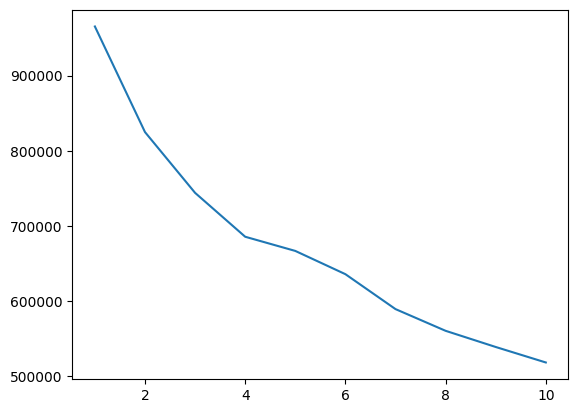

In [46]:
from sklearn.cluster import KMeans
ss=[]
k_range=range(1,11)
for k in k_range:
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(scaled)
    ss.append(km.inertia_)
plt.plot(k_range,ss)
plt.show()

# Kmeans Clustering

In [47]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=4,random_state=42)
label=kmean.fit_predict(scaled)
df['cluster']=label
df['cluster']

C:\Users\PC\AppData\Local\Temp\ipykernel_6388\1111171895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=label


0         0
1         0
2         0
3         2
4         2
5         0
6         2
7         0
8         3
9         0
10        3
11        0
12        0
13        3
15        0
16        2
17        2
18        2
19        2
20        1
21        0
22        0
23        0
24        0
25        0
26        3
27        2
28        2
29        2
30        2
31        3
32        3
33        3
34        2
35        2
36        2
37        3
38        3
39        0
40        2
41        2
42        2
43        2
44        0
45        1
46        2
47        0
48        3
49        0
50        2
51        3
52        3
53        0
54        2
55        2
56        0
57        2
58        2
59        3
61        0
62        0
63        2
64        2
65        3
67        3
68        0
69        0
70        2
71        0
72        2
73        2
74        2
75        1
77        2
78        2
82        2
83        2
84        0
85        2
86        2
87        0
88        3
93        0
95  

In [48]:
df.head()

,order_id,customer_id,order_status,product_id,seller_id,price,freight_value,product_category_name,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_title,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,purchase_year,purchase_month,order_approved_days,estimated_days,shipping_days,order_approved_hour,cluster
0,88253,61307,2,17417,630,29.99,8.72,72,1.0,1,1.0,18.12,4.0,3933,46407,3149,3588,25,9350.0,328,22,2017,10,2.0,15,4.0,11.0,0
1,88253,61307,2,17417,630,29.99,8.72,72,3.0,3,1.0,2.00,4.0,3933,46407,3149,3588,25,9350.0,328,22,2017,10,2.0,15,4.0,11.0,0
2,88253,61307,2,17417,630,29.99,8.72,72,2.0,3,1.0,18.59,4.0,3933,46407,3149,3588,25,9350.0,328,22,2017,10,2.0,15,4.0,11.0,0
3,32271,68222,2,11598,477,118.70,22.76,62,1.0,0,1.0,141.46,4.0,1712,65364,47813,417,4,31570.0,64,22,2018,7,26.0,19,5.0,3.0,2
4,27537,25340,2,21798,857,159.90,19.22,8,1.0,1,3.0,179.12,5.0,3933,21866,75265,4041,8,14840.0,218,22,2018,8,8.0,26,5.0,8.0,2


In [49]:
print(km.cluster_centers_)

[[-9.81585490e-02 -1.75905276e-01  3.22616408e-01 -1.08709851e+00
   6.58336600e-01  3.17263389e-02 -9.02427413e-01 -4.24529392e-03
   4.87738266e-01]
 [-1.74399611e-01 -1.85096694e-01  3.44236575e-01  8.59194575e-01
  -5.73975427e-01 -2.75567722e-01 -1.19098726e-01 -4.45158581e-02
  -1.30515924e+00]
 [-1.01077113e-01 -9.56917533e-02 -2.15670489e+00  1.40238434e-01
  -2.06506325e-01  2.39500502e-03  1.23092169e-03 -1.22501049e-02
   7.97575041e-02]
 [-1.11711901e-01 -1.83004730e-01  3.64194960e-01  9.16533671e-01
  -3.89136320e-01 -4.02379722e-01 -9.10657672e-01 -1.80645028e-01
   5.79819556e-01]
 [-1.29889936e-01 -1.98065191e-01  3.88877824e-01  9.16533671e-01
  -5.18534058e-01 -3.79860102e-01  8.77715586e-01 -1.67183779e-01
   4.70028545e-01]
 [-1.05433651e-01 -1.93806225e-01  3.35197961e-01 -1.06330493e+00
   6.35263824e-01 -1.10839356e-01  9.45486984e-01 -1.35503741e-02
   5.16250003e-01]
 [ 6.38565674e+00  1.67306515e+00 -5.41533742e-02  1.42418710e-02
   1.04082175e-04  1.9528783

In [50]:
from sklearn.metrics import silhouette_score
sil=silhouette_score(scaled,df['cluster'])
print(sil)

0.19210924414376204


# Kmeans plot

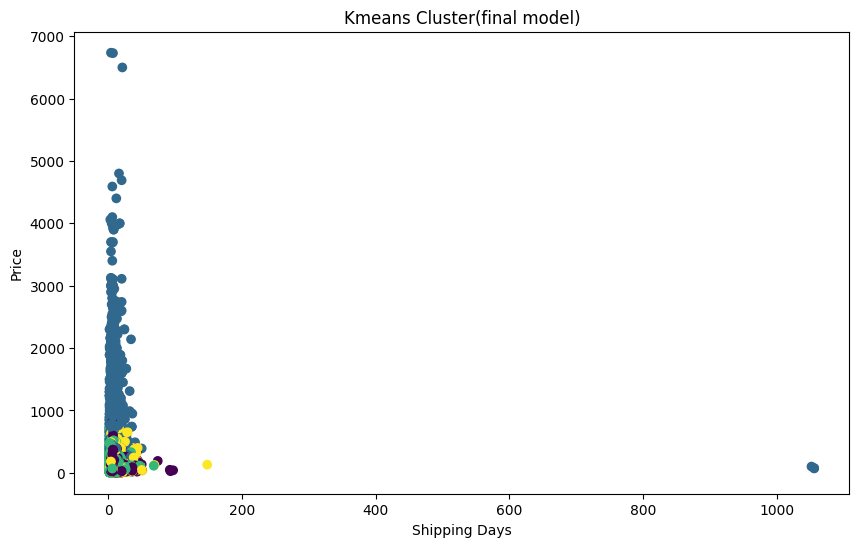

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(df['shipping_days'],df['price'],c=df['cluster'],cmap='viridis')
plt.xlabel("Shipping Days")
plt.ylabel("Price")
plt.title("Kmeans Cluster(final model)")
plt.show()

# Kmeans Plot Analysis

In [ ]:
# Most Customers purchase when shipping days are very low
# Higher-priced items are also bought when delivery is fast
# Some points are outliers(shipping days>1000)

# Hirerachical Clustering

In [52]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [53]:
sample=df.sample(frac=0.03,random_state=42)
sm=sample[['price','order_approved_hour']]

# Dendogram

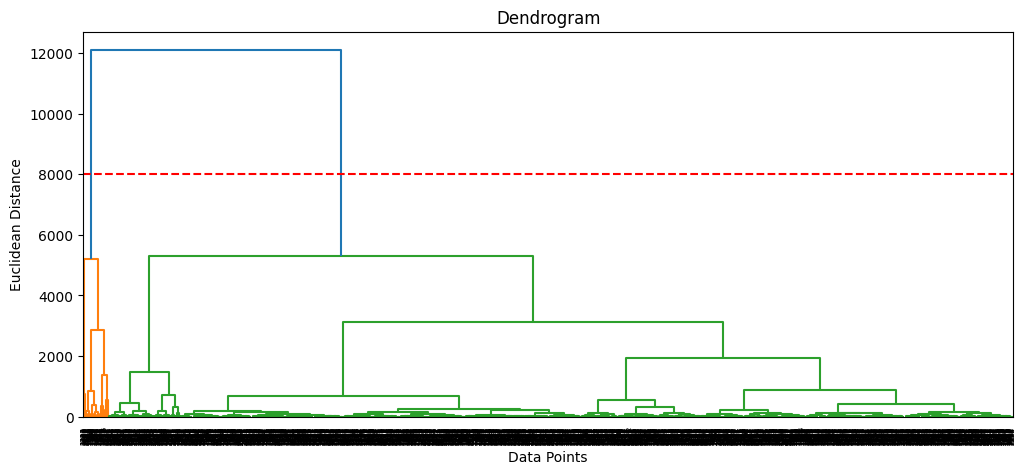

In [54]:
plt.figure(figsize=(12,5))
dent=sch.dendrogram(sch.linkage(sm,method='ward'))
plt.axhline(y=8000,color='red',linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

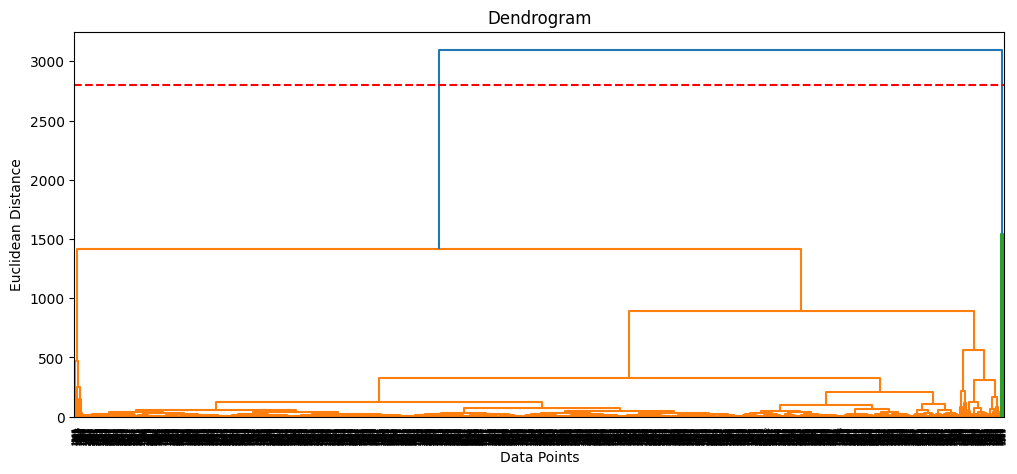

In [55]:
plt.figure(figsize=(12,5))
dent=sch.dendrogram(sch.linkage(sm,method='complete'))
plt.axhline(y=2800,color='red',linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

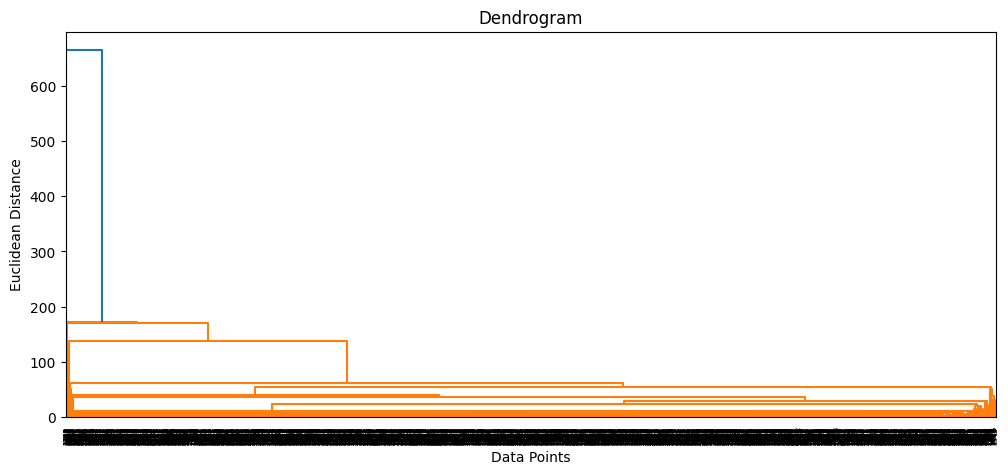

In [56]:
plt.figure(figsize=(12,5))
dent=sch.dendrogram(sch.linkage(sm,method='single'))
plt.axhline(y=8000,color='red',linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

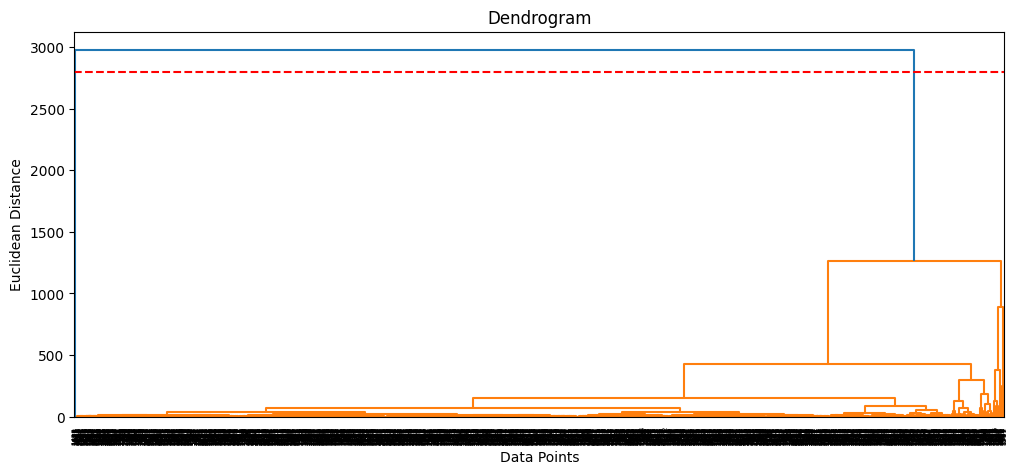

In [57]:
plt.figure(figsize=(12,5))
dent=sch.dendrogram(sch.linkage(sm,method='average'))
plt.axhline(y=2800,color='red',linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [58]:
ag=AgglomerativeClustering(n_clusters=3,linkage='ward')
labels=ag.fit_predict(sm)
sample['ag_cluster']=labels
sample['ag_cluster']

24147     1
89406     1
18055     1
6627      1
21373     1
12178     0
18161     2
71591     1
38012     1
90033     1
103702    1
79655     1
93907     1
9124      1
45994     1
20368     0
4895      1
91202     1
50715     1
107349    1
74453     1
40143     1
84991     1
119020    1
73171     2
116180    1
18346     1
72744     1
71605     1
21489     1
75881     1
75465     1
42258     1
45283     1
41112     1
27281     2
90578     1
2016      1
37638     1
100005    1
16702     1
30766     1
13070     1
36        1
81541     1
19698     1
27049     1
82380     1
111392    1
82481     1
92653     1
58256     1
105067    1
64176     1
29936     1
63851     1
90673     1
32013     1
110014    1
26116     1
78088     1
80676     2
39404     1
10849     1
92812     1
20956     1
103358    1
65324     1
63800     1
61124     1
83634     2
55383     1
2800      2
90579     1
1773      1
28327     1
63220     1
114476    1
93415     1
102579    1
47023     1
4467      1
19519     1
7735

# Hirerachal Plot

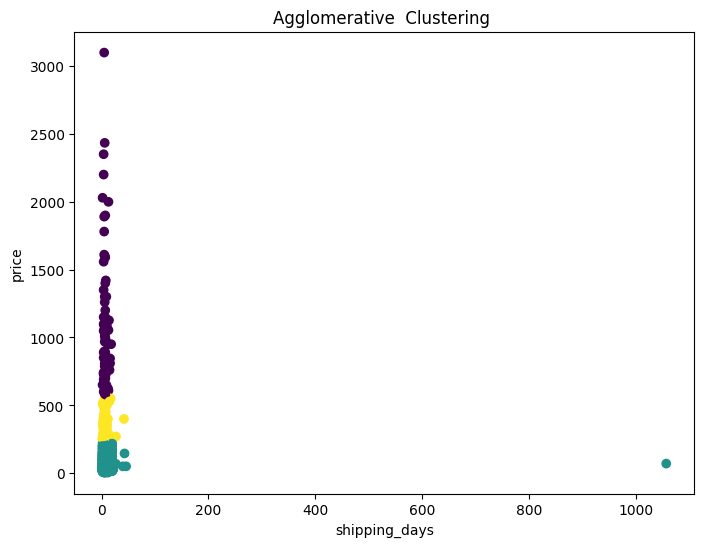

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(sample['shipping_days'],sample['price'],c=sample['ag_cluster'],cmap='viridis')
plt.xlabel('shipping_days')
plt.ylabel('price')
plt.title("Agglomerative  Clustering ")
plt.show()

# Hirerachal Plot Analysis

In [ ]:
# Three natural customer groups:
# Low price + fast delivery
# Medium price + medium delivery
# High price + slow delivery(rare)

# DBSCAN 

In [60]:
samples=df.sample(n=2000,random_state=42)

In [61]:
v=sample[['price','shipping_days']]

In [62]:
st=StandardScaler()
scal=st.fit_transform(v)

In [63]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=10,min_samples=6)
lab=db.fit_predict(scal)
sample["db_cluster"]=labels


In [64]:
np.unique(labels)


array([0, 1, 2], dtype=int64)

# DBCAN Plot

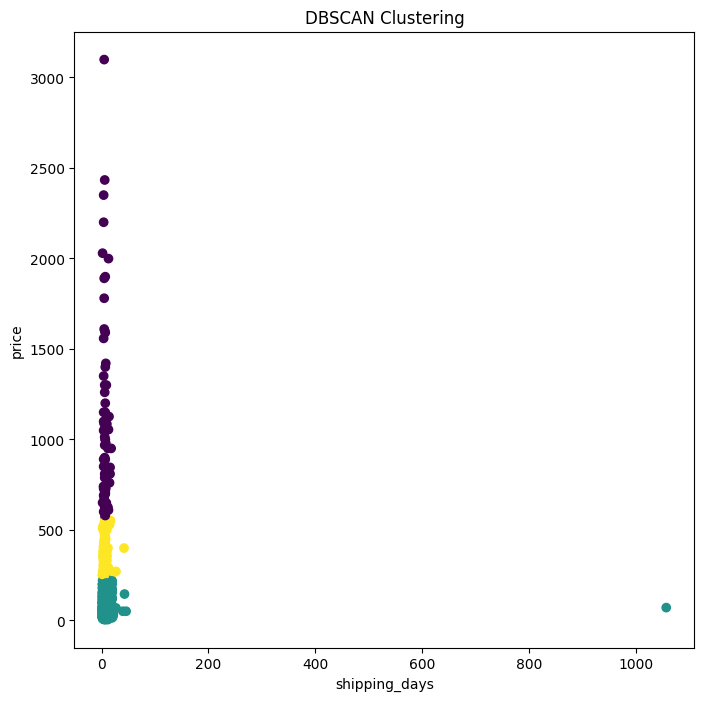

In [65]:
plt.figure(figsize=(8,8))
plt.scatter(sample['shipping_days'],sample['price'],c=sample['db_cluster'],cmap='viridis')
plt.xlabel('shipping_days')
plt.ylabel('price')
plt.title("DBSCAN Clustering")
plt.show()

# DBSCAN Plot Analysis

In [ ]:
# identifies noisy outliyers better
# Cluster are tighter
# Good for anomaly detection(late deliveries)

# Save Models

In [66]:
sc=StandardScaler()
sc.fit(df[feature])

StandardScaler()

In [67]:
km=KMeans(n_clusters=4,random_state=42)
km.fit(df[feature])

KMeans(n_clusters=4, random_state=42)

In [68]:
import pickle 
pickle.dump(km,open("kmeans_v1.pkl","wb"))
pickle.dump(feature,open("feature.pkl","wb"))
pickle.dump(sc,open("scaler_v1.pkl","wb"))

In [69]:
print(km.n_clusters)

4


In [ ]:
final_cl=[
    'order_id',
    'customer_id',
     'order_status',   
     'product_id',
     'seller_id',
     'price',
     'freight_value',
     'product_category_name',
     'payment_sequential',
     'payment_type',
     'payment_installments',
     'payment_value',
     'review_score',
     'review_comment_title',
     'customer_city',
     'customer_state',
     'purchase_year',	
     'purchase_month',
     'order_approved_days',
     'estimated_days',	
    'shipping_days',
    'order_approved_hour',	
    'cluster'
]

In [ ]:
df_fl=df[final_cl].copy()
assert not df_fl.isnull().any().any()
print(df_fl.dtypes)
df_fl.to_csv("fl_data.csv",index=False)

In [ ]:
feature=[
    'price',
    'freight_value',
    'review_score',
    'purchase_year',
    'purchase_month',
    'estimated_days',
    'order_approved_days',	
    'shipping_days',
    'order_approved_hour'
    ]

# Prediction Code

In [ ]:
sc=pickle.load(open("scaler_v1.pkl","rb"))
kmean=pickle.load(open("kmeans_v1.pkl","rb"))
feature=pickle.load(open("feature.pkl","rb"))
df=pd.read_csv("fl_data.csv")
required_cols=feature[:]
missing=[c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns in fl_data.csv: {missing}")
x_test=df[required_cols].copy()
if x_test.isnull().any().any():
    raise ValueError("Null values present in x_tset - handle them before scaling.")
x_scaled=sc.transform(x_test)
print("scaled shape:",x_scaled.shape)
pred=kmean.predict(x_scaled)
print("kmean unique labels:",np.unique(pred))
df[df['cluster']]=pred
df.to_csv("final_data_with_kmeans.csv",index=False)
print("first 20 kmean labels:",pred[:20])
                     